In [19]:
import numpy as np
import pandas as pd
import networkx as nx
import time
import timeit
from datetime import datetime,timedelta
import http.client
import requests
import json
import yfinance as yf
#%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from heapq import *
import planarity
from sklearn.linear_model import LinearRegression
import scipy as sc
import math

In [20]:
#!pip install finta
from finta import TA
from sklearn.decomposition import PCA
from sklearn.preprocessing import MinMaxScaler

trial start

In [62]:
cur_components_df = pd.read_excel('S&P500 current components.xlsx')
tk = cur_components_df.Symbol.values
start = '2017-04-01'
end = '2022-04-01'
tk_data = yf.download(list(tk), start, end)['Adj Close']
tk_list = list(tk_data.dropna(axis=0,how='all').dropna(axis=1).columns)

[*********************100%***********************]  503 of 503 completed*******]  821 of 503 completed

42 Failed downloads:
- LUMN: CircuitBreaker 'redis' is OPEN and does not permit further calls
- CMG: CircuitBreaker 'redis' is OPEN and does not permit further calls
- DLTR: CircuitBreaker 'redis' is OPEN and does not permit further calls
- CAH: CircuitBreaker 'redis' is OPEN and does not permit further calls
- A: CircuitBreaker 'redis' is OPEN and does not permit further calls
- KEY: CircuitBreaker 'redis' is OPEN and does not permit further calls
- T: CircuitBreaker 'redis' is OPEN and does not permit further calls
- REG: CircuitBreaker 'redis' is OPEN and does not permit further calls
- KHC: CircuitBreaker 'redis' is OPEN and does not permit further calls
- NVR: CircuitBreaker 'redis' is OPEN and does not permit further calls
- SWK: CircuitBreaker 'redis' is OPEN and does not permit further calls
- CHRW: CircuitBreaker 'redis' is OPEN and does not permit further calls
- FANG: Circ

In [58]:
def backtest(start, end,tk_list, freq='m',train_day = 30,filter_mtd = 'PMFG',measure = 'centrality',num = 50):
    components_price_df = yf.download(tk_list, start, end)['Adj Close']
    components_price_df.index = pd.to_datetime(components_price_df.index)
    # components_price_df.to_csv('components_price_new.csv')
    return components_price_df

trial end

In [63]:
backtest('2017-04-01','2017-05-01',tk_list)

[*********************100%***********************]  436 of 436 completed

6 Failed downloads:
- DLTR: No data found for this date range, symbol may be delisted
- ABMD: No data found for this date range, symbol may be delisted
- ROK: No data found for this date range, symbol may be delisted
- FMC: No data found for this date range, symbol may be delisted
- FDX: No data found for this date range, symbol may be delisted
- CAH: No data found for this date range, symbol may be delisted
[*********************100%***********************]  436 of 436 completed

,A,AAL,AAP,AAPL,ABMD,ABT,ACN,ADBE,ADI,ADP,...,WY,WYNN,XEL,XOM,XRAY,XYL,YUM,ZBRA,ZION,ZTS
Date,,,,,,,,,,,,,,,,,,,,,
2017-04-03,51.231960,41.112087,141.211517,34.062683,NaN,40.821362,108.467392,129.589996,74.565880,92.410942,...,27.299015,108.338188,39.272068,63.079258,59.795860,46.596352,58.268444,91.430000,37.607231,51.582150
2017-04-04,50.673412,39.610931,138.823975,34.316322,NaN,40.555157,108.836205,130.039993,74.565880,92.575180,...,27.501472,108.710655,39.369354,63.309837,58.974911,47.463261,58.534355,91.680000,37.508186,51.178738
2017-04-05,50.760098,40.008007,138.532837,34.138531,NaN,40.206326,108.467392,129.889999,73.464485,93.013206,...,27.509567,108.654800,39.643551,63.432812,59.175388,47.519794,58.561855,90.610001,36.958981,51.198185
2017-04-06,51.183819,40.405098,138.358139,34.053204,NaN,40.086994,107.702103,130.149994,73.721458,92.848961,...,27.865892,109.744308,39.440125,63.801754,60.177715,47.981522,59.185356,92.730003,37.364132,51.198185
2017-04-07,50.885277,40.492260,137.863159,33.977352,NaN,40.233868,108.282997,130.220001,73.436958,93.250473,...,28.230307,108.794479,39.272068,63.609589,59.624035,47.896717,58.937778,92.129997,37.382137,51.071819
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-03-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,70.699997,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,71.239998,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2022-03-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,71.830002,NaN,NaN,NaN,NaN,NaN,NaN,NaN


[***********************109%*************************]  474 of 436 completed

In [ ]:
changes_df = pd.read_excel('S&P500 changes.xlsx',index_col='date')
changes_df.index = pd.to_datetime(changes_df.index)
changes_df = changes_df.loc['2017-04-01':]
changes_df.tail()

In [ ]:
cur_components_df = pd.read_excel('S&P500 current components.xlsx')
cur_components_df.head()

In [ ]:
# generate S&P500 components from now to historical periods.
# initialize
components_mark_df = pd.DataFrame()
prev_date = 0
stocks = list(cur_components_df['Symbol'])
# generate historical components based on changes
for date in changes_df.index[:-1]:
    if date != prev_date:
        components_mark_df.loc[date, stocks] = 1
        prev_date = date
        removed = changes_df.loc[date, 'Removed Ticker']
        added = changes_df.loc[date, 'Added Ticker']
        
        if type(removed) == str:
            stocks.append(removed)            
        elif isinstance(removed, pd.Series):
            for ele in list(removed.values):
                if type(ele) == str: stocks.append(ele)
                    
                    
        if type(added) == str:
            stocks.remove(added)
        elif isinstance(added, pd.Series):
            for ele in list(added.values):
                if type(ele) == str: stocks.remove(ele)
                    
components_mark_df = components_mark_df.sort_index()
components_mark_df.head()
#components mark df 是所有的股票在变动日那天是否存在于SP500的boolean dataframe, nan为不在, 1 为存在

In [ ]:
startdate = '2021-06-01'
# startdate = datetime.strptime(startdate, '%Y-%m-%d')-timedelta(days=60)
enddate = '2022-06-28'
tickers = list(components_mark_df.columns)
components_price_df = yf.download(tickers, startdate, enddate,)['Adj Close']

components_price_df.index = pd.to_datetime(components_price_df.index)
# components_price_df.to_csv('components_price_new.csv')

In [ ]:
#components_price_df = pd.read_csv('components_price_new.csv',index = 'Date')

In [27]:
components_price_df.index = pd.to_datetime(components_price_df.index)

for ticker in components_price_df.columns:
    # delete stock whose information can not be retrived
    if components_price_df[ticker].isnull().values.all():
        components_price_df = components_price_df.drop(columns=[ticker])
        #print(tick)
        continue
    # process abnormal data
    for d in components_price_df.index:
        if type(components_price_df.loc[d,ticker]) == str:
            components_price_df.loc[d,ticker]=np.nan
        else:
            if components_price_df.loc[d,ticker]<0 or components_price_df.loc[d,ticker]>9999:
                components_price_df.loc[d,ticker]=np.nan
# fillna with previous price
components_price_df = components_price_df.fillna(method="ffill")
components_price_df = components_price_df.fillna(method="bfill")

# Generating Features, use ticker with yfinance, read close/volume/high/low and use package to generate features.
# finta: https://github.com/peerchemist/finta
# need period, return null when valid data is less than 80% of the whole period
# ticker:'AMZN', start:'2019-01-01'
from finta import TA
def feature_generate(ticker,start,end):
    tk = yf.Ticker(ticker)
    ohlc = pd.DataFrame()
    ohlc['open'] = tk.history(start=start, end=end)['Open']
    ohlc["high"] = tk.history(start=start, end=end)['High']
    ohlc["low"] = tk.history(start=start, end=end)['Low']
    ohlc["close"] = tk.history(start=start, end=end)['Close']
    ohlc["volume"] = tk.history(start=start, end=end)['Volume']
    
    sta = pd.DataFrame()
    sta['return'] = (ohlc["close"] - ohlc["close"].shift())/ohlc["close"].shift()
    sta['open'] = ohlc['open']/ohlc["close"]
    sta["high"] = ohlc['high']/ohlc["close"]
    sta["low"] = ohlc['low']/ohlc["close"]
    sta["volume"] = (ohlc["volume"] - ohlc["volume"].shift())/ohlc["volume"].shift()
    
    df = pd.DataFrame()
    df['SMA']= TA.SMA(ohlc)
    df['SMM'] = TA.SMM(ohlc)
    df['ER'] = TA.ER(ohlc)
    df['MACD'] = TA.VW_MACD(ohlc).iloc[:,0]
    df['signal'] = TA.VW_MACD(ohlc).iloc[:,1]
    df['MOM'] = TA.MOM(ohlc)
    df['ROC'] = TA.ROC(ohlc)
    df['RSI'] = TA.RSI(ohlc)
    df['TR']= TA.TR(ohlc)
    df['SAR'] = TA.SAR(ohlc)
    df['BBANDS'] = TA.BBANDS(ohlc).iloc[:,1]
    df['BBWIDTH'] = TA.BBWIDTH(ohlc)
    df['KC_UPPER'] = TA.KC(ohlc).iloc[:,0]
    df['KC_LOWER'] = TA.KC(ohlc).iloc[:,1]
    df['DO'] = TA.DO(ohlc).iloc[:,1]
    df['DMI'] = TA.DMI(ohlc).iloc[:,1]
#     df['PIVOT'] = TA.PIVOT(ohlc).iloc[:,0]
#     df['WILLIAMS']= TA.WILLIAMS(ohlc)
#     df['UO'] = TA.UO(ohlc)
#     df['AO'] = TA.AO(ohlc)
#     df['MI'] = TA.MI(ohlc)
#     df['Vlm'] = TA.VORTEX(ohlc).iloc[:,0]
#     df['Vlp'] = TA.VORTEX(ohlc).iloc[:,1]
#     df['KST'] = TA.KST(ohlc).iloc[:,0]
#     df['TP'] = TA.TP(ohlc)
#     df['ADL'] = TA.ADL(ohlc)      
#     df['CHAIKIN']= TA.CHAIKIN(ohlc)
#     df['MFI'] = TA.MFI(ohlc)
# #     df['OBV'] = TA.OBV(ohlc)
#     df['EFI'] = TA.EFI(ohlc)
#     df['Bull'] = TA.EBBP(ohlc).iloc[:,0]
#     df['Bear'] = TA.EBBP(ohlc).iloc[:,1]
#     df['EMV'] = TA.EMV(ohlc)
#     df['CCI'] = TA.CCI(ohlc)
#     df['COPP']= TA.COPP(ohlc)
#     df['Buy'] = TA.BASP(ohlc).iloc[:,0]
#     df['Sell'] = TA.BASP(ohlc).iloc[:,1]
#     df['Short'] = TA.CHANDELIER(ohlc).iloc[:,0]
#     df['Long'] = TA.CHANDELIER(ohlc).iloc[:,1]
#     df['FISH'] = TA.FISH(ohlc)
#     df['VPT'] = TA.VPT(ohlc)
#     df['MSD'] = TA.MSD(ohlc)
#     df['STC'] = TA.STC(ohlc)

    final = sta.join(df)
    final.columns = pd.MultiIndex.from_product([[ticker], final.columns])
    return final

[**********************73%**********             ]  440 of 604 completed

In [28]:
# input stocks, start, end,
# output merged multiindex dataframe with stocks and corresponding feature values
def merge_df(stocks,start,end):
    read_start = datetime.strptime(start, '%Y-%m-%d')-timedelta(days=60)
    test_df = feature_generate(stocks[0],read_start,end)
    for ticker in stocks[1:]:
        test_df = test_df.join(feature_generate(ticker,read_start,end))
    df = test_df.loc[start:end,:]
#     time = df.index.to_list()
    
    return df

# input stock price dataframe (will inplace price with pca values)
# output dataframe of stock pca dataframe
def pca_df(components_df, q, merged_df):
    pca = PCA(n_components=q)
#     count = 0
    for date in merged_df.index:
        df = merged_df.loc[[date]]
        df = df.reset_index().drop('Date', axis=1, level=0).T.reset_index()
        df.columns = ['ticker', 'type', 'value']
        df = df.pivot_table(index='ticker', columns='type', values='value')
        df = df.apply(lambda x: (x-np.mean(x))/np.std(x),axis=0)
    #   count += 1
    #     if sum(df.isnull().any()) > 0:
    #         nans.append(date)
    #     print(count)
        pca.fit_transform(df)
        weight = pca.components_[:1,:]
        pc = df.dot(weight.T)
        pc.apply(lambda x: (x-np.mean(x))/np.std(x),axis=0)
        for ticker in pc.index:
            components_df.loc[date][ticker] = pc.loc[ticker, 0]
    return components_df

In [29]:
valid_tickers = components_price_df.columns.values
merged_df = merge_df(valid_tickers[:300], '2022-06-01', '2022-06-06')


[*********************100%***********************]  603 of 604 completed- ADI: No data found for this date range, symbol may be delisted
- AIV: No data found for this date range, symbol may be delisted
- AIV: No data found for this date range, symbol may be delisted
- AOS: No data found for this date range, symbol may be delisted


KeyboardInterrupt: 

In [ ]:
merged_df = merged_df.dropna(axis = 1)
merged_df.columns

In [17]:
components_df = components_price_df.copy()
test_pca = pca_df(components_df.loc['2022-06-01':'2022-06-28'].iloc[:,:300], 1, merged_df.loc['2022-06-01':'2022-06-27'])

In [18]:
test_pca

,A,AAL,AAP,AAPL,ABBV,ABC,ABMD,ABT,ACN,ADBE,...,LMT,LNC,LNT,LOW,LRCX,LUMN,LUV,LVS,LW,LYB
Date,,,,,,,,,,,,,,,,,,,,,
2022-06-01,-0.816784,17.290001,184.385178,148.503723,144.666809,149.544434,255.360001,114.570755,297.591461,418.160004,...,436.406525,55.795483,62.729340,190.636490,502.149017,11.682119,44.150002,35.160000,66.370491,106.555817
2022-06-02,-1.292146,17.459999,187.755310,151.000259,145.390045,147.750031,269.630005,116.989998,305.533203,441.279999,...,438.204590,55.824928,61.945103,195.021576,519.532898,11.545372,44.570000,35.529999,67.905884,107.432053
2022-06-03,-1.370809,16.219999,187.401581,145.178345,145.806152,146.573685,262.250000,116.054161,303.869141,429.760010,...,439.774200,54.637367,61.657215,194.345398,510.280060,11.369555,43.840000,34.959999,67.965698,105.991203
2022-06-06,-1.117433,16.299999,187.411423,145.937286,145.172089,146.434128,260.100006,115.904823,303.649933,429.459991,...,440.489471,55.844555,62.074150,195.657959,512.543640,11.457462,44.419998,35.500000,68.773277,108.389328
2022-06-07,-1.049685,16.690001,183.579468,148.503723,147.757904,149.095840,268.230011,116.362785,305.443542,433.420013,...,453.294556,55.746410,62.709484,194.544266,519.671997,11.574676,44.880001,35.830002,68.843063,110.826927
2022-06-08,-0.365164,16.150000,181.889481,147.754776,147.866882,145.965591,265.359985,114.182480,301.567352,428.839996,...,440.489471,55.471603,60.674431,191.362366,508.443390,11.398857,43.369999,37.389999,68.065399,108.537361
2022-06-09,0.272279,15.470000,181.437515,142.442139,144.082275,143.513229,257.109985,112.211235,294.382874,426.420013,...,429.869873,53.381115,59.195293,193.182022,489.897827,11.183969,42.040001,35.290001,67.217949,106.800446
2022-06-10,0.518039,14.710000,176.298782,136.939789,141.872940,144.001694,250.429993,109.144867,284.996277,393.839996,...,427.356537,50.171768,58.887554,185.276947,470.994904,11.008151,40.139999,33.500000,66.380470,101.224556
2022-06-13,0.730164,13.320000,169.185135,131.697067,138.127975,141.080795,240.570007,105.441338,275.519989,371.649994,...,421.137756,46.854465,56.961697,180.235596,443.861603,10.256041,37.619999,30.600000,64.954750,96.309875


In [19]:
def PMFG(G):
    # sort edges weight in descending order
    h = []
    for u,v,d in G.edges(data=True):
        heappush(h,(d['weight'],u,v))
    heapsort = [heappop(h) for i in range(len(h))]
    heapsort.reverse()
    
    # PMFG algorithm
    res = nx.Graph()
    for (w,u,v) in heapsort:
        res.add_edge(u,v,weight=w)
        if not planarity.is_planar(res):
            res.remove_edge(u,v)
            
        if res.number_of_edges() == 3*(G.number_of_nodes()-2):
            break   

    return res
def PCA_distance(PCA_res):
    """To construct a 'matrix' representing 'weights' between points
    time-T, vector-q, number of stocks-N
    N * (q*T) matrix
    norm: distance norm 
    Output: N*N matrix"""
    T,N = PCA_res.shape
    res = np.zeros((N,N))
    for i in range(1,N):
        for j in range(i):
            Diff = PCA_res.iloc[:,i] - PCA_res.iloc[:,j]
            distance = sc.linalg.norm(Diff,1)
            res[i][j] = 1/distance   # larger distance means weaker correlation
    res = res + res.T  # symmetric matrix with diagonals vanish
    return res

In [20]:
relation_matrix = PCA_distance(test_pca)
rel_mat = pd.DataFrame(data=relation_matrix,columns=test_pca.columns,index =test_pca.columns)
G1 = nx.from_pandas_adjacency(rel_mat)    # weights are 1/distance

In [21]:
def dict_from_weights(matrix):
    """Input: diagonal entris=0, entries representing the length of relevance between stocks
    Output: an array of length N, value between [0,1]
    This can be used in SS-spread sampling, as probability of choosing a node or not"""
    # if correlation matrix, should input matrix = correlation_matrix - np.diag(np.diag(correlation_matrix))
    N = matrix.shape[0]
    total = np.dot(np.abs(matrix),np.ones(N))
    scaled = total / np.max(total)
    G = nx.from_pandas_adjacency(matrix)
    d = {}
    for i in range(len(list(G.nodes()))):
        node = list(G.nodes())[i]
        d[node] = scaled[i]
            
    return d

def SS(G, p_dict, k, num):
    """Spread Sampling
    Input: G-a graph, p_dict-a dictionary, node: probability of being chosen
    k: disgard points which is connected by multi nodes in the selected S set
    num: number of nodes we tempt to select
    Output: a graph with nodes S, as a subgraph of G"""
    S = []
    C = list(G.nodes())
    R = []
    while (len(S) <= num) and (len(C) > 0):
        for node in C: # to add some point into S while removing them from C
            indicator = sc.stats.bernoulli.rvs(p_dict[node]/5)
#             indicator = scipy.stats.bernoulli.rvs(0.5)
            if indicator:
                C.remove(node)
                S.append(node)
        for node in C:  # for remove nodes in C where it has many connections to S
            cnt = 0
            for nbr in nx.neighbors(G,node):
                if nbr in S:
                    cnt += 1
            if cnt >= k:
                C.remove(node)
                R.append(node)
    res = nx.Graph()
    for node in S:
        for nbr in nx.neighbors(G,node):
            if nbr in S:
                res.add_edge(node,nbr,weight=G.edges[node, nbr]['weight'])
#                 if G.edges[node, nbr]['weight'] < 0:
#                     res.add_edge(node,nbr,weight=0)
# #                     print(G.edges[node, nbr]['weight'])
#                 else:
#                     res.add_edge(node,nbr,weight=G.edges[node, nbr]['weight'])
        
    return res   

In [22]:
def WTA_weight(G, rho, proportion, edges_filter=False):
    # sort edges weight in descending order
    h = []
    for u,v,d in G.edges(data=True):
        heappush(h,(d['weight'],u,v))
    heapsort = [heappop(h) for i in range(len(h))]
    heapsort.reverse()
    
    # total number of possible edges
    num_nodes = len(list(G.nodes()))
    num_all_possible_edges = num_nodes * (num_nodes - 1) / 2
    target_num = math.ceil(proportion * num_all_possible_edges)
    
    
    # winner-take-all criterion
    res = nx.Graph()
    for (w,u,v) in heapsort:
        if w >= rho:
            res.add_edge(u,v,weight=w)
        if edges_filter:
            if res.number_of_edges() == target_num:
                break
    
    return res



def WTA_proportion(G, rho, proportion, values_filter=False):
    # sort edges weight in descending order
    h = []
    for u,v,d in G.edges(data=True):
        heappush(h,(d['weight'],u,v))
    heapsort = [heappop(h) for i in range(len(h))]
    heapsort.reverse()
    
    # total number of possible edges
    num_nodes = len(list(G.nodes()))
    num_all_possible_edges = num_nodes * (num_nodes - 1) / 2
    target_num = math.ceil(proportion * num_all_possible_edges)
    
    
    # winner-take-all criterion
    res = nx.Graph()
    cnt = 0
    for (w,u,v) in heapsort:
        if values_filter:
            if w <= rho:
                break
        if cnt <= target_num:
            res.add_edge(u,v,weight=w)
            cnt += 1
    
    return res

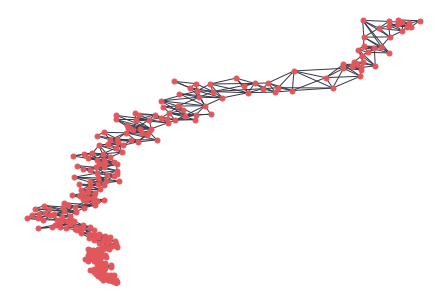

In [23]:
G1_PMFG = PMFG(G1)
nx.draw(G1_PMFG, with_labels=False, node_size=25, node_color="#e1575c", edge_color='#363847', \
        pos=nx.kamada_kawai_layout(G1_PMFG))
p1_SS = dict_from_weights(rel_mat)   # between [0,1]
G1_SS = SS(G1, p1_SS, 5, 25)

In [24]:
len(G1_PMFG.nodes())

300

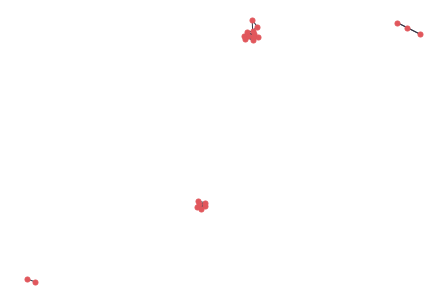

In [25]:
G1_SS_p = WTA_proportion(G1_SS, 0, 0.1)  # the 0 doesn't matter, only 0.1 means to select top 10% edges
nx.draw(G1_SS_p, with_labels=False, node_size=25, node_color="#e1575c", edge_color='#363847', \
        pos=nx.kamada_kawai_layout(G1_SS_p))

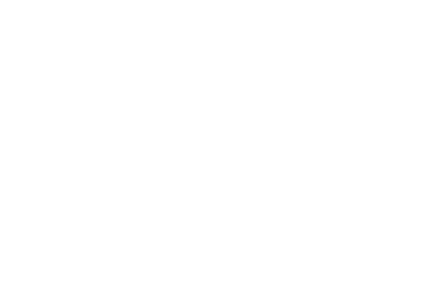

In [26]:
G1_SS_w = WTA_weight(G1_SS, 0.7, 1) # the 1 doesn't matter, only 0.7 means to select weights over 0.7
nx.draw(G1_SS_w, with_labels=False, node_size=25, node_color="#e1575c", edge_color='#363847', \
        pos=nx.kamada_kawai_layout(G1_SS_w))

### Back Test

In [27]:
# Extract the first available day at every month from 2019 and store in dateindex_new
dateindex_new = []
year_prev, month_prev = 0, 0
for date in components_price_df.index:
    if date.year >= 2017:
        if ((date.year != year_prev) or (date.month != month_prev)):
            dateindex_new.append(date)
            year_prev = date.year
            month_prev = date.month
dateindex_new = pd.to_datetime(dateindex_new)[5:]
dateindex_new

DatetimeIndex(['2021-11-01', '2021-12-01', '2022-01-03', '2022-02-01',
               '2022-03-01', '2022-04-01', '2022-05-02', '2022-06-01'],
              dtype='datetime64[ns]', freq=None)

In [28]:
from pypfopt import expected_returns, efficient_frontier, risk_models

def weight_equal(stock_lst):
    # return a equal weight vector of this stock list
    num_stocks = len(stock_lst)
    weight_series = pd.Series(np.ones(num_stocks)/num_stocks, index = stock_lst)
    return weight_series
    
    
def weight_low_vol(date,stocks_lst, components_price_df):
    components_ret_df = components_price_df.pct_change().dropna()
    vol_series = components_ret_df.loc[(date-datetime.timedelta(days=365)):date, stocks_lst].std()
    weight_series = (1/vol_series)
    weight_series[weight_series>999]=0
    weight_series = weight_series/ weight_series.sum()
    #weight_df = pd.DataFrame(0,index=[date],columns=stocks_lst)
    #weight_df.loc[date, weight_series.index] = weight_series.values
    return weight_series

def weight_markowitz(date, stocks_lst, components_price_df):
    df = components_price_df.loc[(date-datetime.timedelta(days=365)):date, stocks_lst]
    mu = expected_returns.mean_historical_return(df)
    S = risk_models.CovarianceShrinkage(df).ledoit_wolf()
    ef = efficient_frontier.EfficientFrontier(mu, S)
    weight_dict = ef.min_volatility()
    
    weight_series = pd.Series(dtype='float64')
    for (k, v) in weight_dict.items():
        weight_series[k] = v
    return weight_series

In [72]:
def tracking_error(Portfolio, benchmark):
    # Calculate the tracking error between the portfolio and benchmark
    # Portfolio: the time series of the portfolio's value
    # benchmark: the time series of the index value
    Portfolio_return = Portfolio.pct_change().dropna() # Calculate the return of portfolio
    bench_return = benchmark.pct_change().dropna() # Calculate the return of benchmark
    
    return np.std(Portfolio_return-benchmark)
    
def back_test(P_weight, components_price_df):
    # Back test the portfolio based on the components' weight
    # P_weight: the weight of the portfolio's components
    # components_price_df: the time series of the components price
    # Return: the time series of this portfolio's value
    
    Portfolio = pd.Series(index = P_weight.index)
    for date in list(components_price_df.index):
        # find the first date of this month, the rank data is available on this date.
        prev_date = 0
        for temp_date in dateindex_new:
            if temp_date <= date:
                prev_date = temp_date
            else:
                break

        Portfolio[date] = P_weight.loc[prev_date]@components_price_df.loc[date]
    
    return Portfolio
    
    

[*********************100%***********************]  1 of 1 completed


<ipython-input-72-b738e479f00b>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  Portfolio = pd.Series(index = P_weight.index)


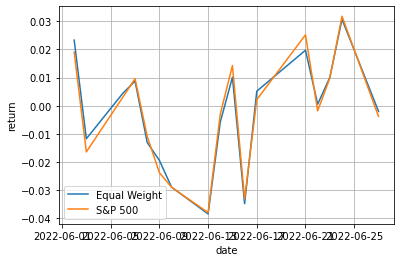

17.04945597044563

In [78]:
stock_lst = list(G1_PMFG.nodes())
SPY = yf.download('SPY', '2022-07-01', '2022-07-28')['Adj Close']
start_date = SPY.index[0]

weight_equal_stock = weight_equal(stock_lst)
weight_equal_portfolio = pd.DataFrame(np.zeros([1, components_price_df.shape[1]]),index = [start_date], columns = components_price_df.columns)
weight_equal_portfolio.loc['2022-06-01', weight_equal_stock.index] = weight_equal_stock

weight_equal_Portfolio_value = back_test(weight_equal_portfolio, components_price_df.loc['2022-06-01':])
weight_equal_Portfolio_return = weight_equal_Portfolio_value.pct_change().dropna()
SPY_return = SPY.pct_change().dropna()
weight_equal_tracking_error = tracking_error(weight_equal_Portfolio_value, SPY)

plt.plot(weight_equal_Portfolio_return.index, weight_equal_Portfolio_return, label = 'Equal Weight')
plt.plot(SPY_return.index, SPY_return, label = 'S&P 500')
plt.legend()
plt.ylabel('return')
plt.xlabel('date')
plt.grid()
plt.show()

weight_equal_tracking_error
